# Dataset Overview:
The analysis is based on a dataset of airline tweets, containing 14,640 entries with various features including sentiment, airline, and tweet text. The sentiment distribution shows a majority of negative tweets (9,178), followed by neutral (3,099) and positive (2,363) sentiments.

In [26]:
# Import the pandas library to handle data as DataFrames (like tables)
import pandas as pd

# Load the dataset into a DataFrame
# 'Tweets.csv' is the path to the file that contains the dataset
# pd.read_csv is used to read the CSV file into a pandas DataFrame
file_path = 'Tweets.csv'
tweets_df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
# .head() returns the first 5 rows of the DataFrame (you can pass a number to get more or fewer rows)
# .columns returns the names of the columns in the dataset
tweets_df.head(), tweets_df.columns

(             tweet_id airline_sentiment  airline_sentiment_confidence  \
 0  570306133677760513           neutral                        1.0000   
 1  570301130888122368          positive                        0.3486   
 2  570301083672813571           neutral                        0.6837   
 3  570301031407624196          negative                        1.0000   
 4  570300817074462722          negative                        1.0000   
 
   negativereason  negativereason_confidence         airline  \
 0            NaN                        NaN  Virgin America   
 1            NaN                     0.0000  Virgin America   
 2            NaN                        NaN  Virgin America   
 3     Bad Flight                     0.7033  Virgin America   
 4     Can't Tell                     1.0000  Virgin America   
 
   airline_sentiment_gold        name negativereason_gold  retweet_count  \
 0                    NaN     cairdin                 NaN              0   
 1              

In [27]:
# Basic information about the dataset
# This will give you an overview of the dataset including the number of rows, columns, data types, and memory usage
print(tweets_df.info())

# Statistical summary of numerical columns
# .describe() gives summary statistics (like count, mean, std deviation, etc.) for the numerical columns in the dataset
print(tweets_df.describe())

# Display the first few rows of the dataset
# .head() will display the first 5 rows to give a quick look at the data
print(tweets_df.head())

# Check for missing values in the dataset
# .isnull().sum() checks each column for missing (NaN) values and sums them up to show how many missing values exist
print(tweets_df.isnull().sum())

# Count the unique sentiment labels in the 'airline_sentiment' column
# This will show how many tweets have 'positive', 'neutral', or 'negative' sentiments
print(tweets_df['airline_sentiment'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

The dataset is loaded and basic statistics like the count of positive, neutral, and negative sentiments are analyzed. The majority of the sentiments are negative (9178), followed by neutral (3099) and positive (2363).
Missing values are observed in columns like negativereason and tweet_coord.

/var/folders/0m/h8sjlqcn079bq8mjlftnjppm0000gn/T/ipykernel_5103/1067809276.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='airline_sentiment', data=tweets_df, palette=palette)


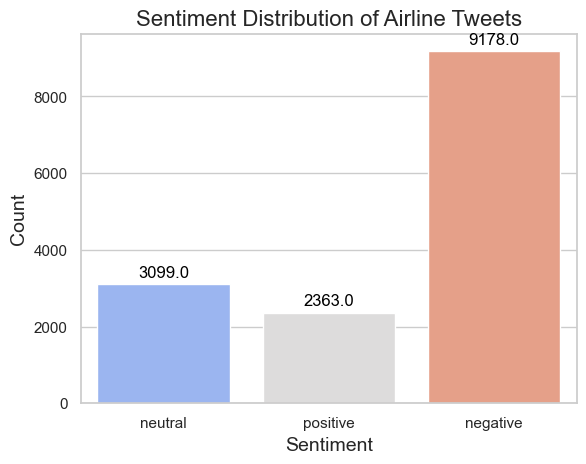

In [28]:
# Import seaborn and matplotlib for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Set a different style and color palette for the plot
sns.set(style="whitegrid")
palette = sns.color_palette("coolwarm", 3)  # Cool and warm tones

# Create the bar plot with a different palette and style
ax = sns.countplot(x='airline_sentiment', data=tweets_df, palette=palette)

# Add a title to the plot with larger font size
plt.title('Sentiment Distribution of Airline Tweets', fontsize=16)

# Adding labels on top of each bar to show counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')

# Customizing the axis labels
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Display the plot
plt.show()


In [29]:
# Import necessary libraries for data processing and model training
from sklearn.model_selection import train_test_split  # For splitting the dataset into training and testing sets
from sklearn.feature_extraction.text import TfidfVectorizer  # For converting text data into numerical format
from sklearn.preprocessing import LabelEncoder  # For encoding categorical labels into numerical format

# Filter out neutral sentiments and only keep positive and negative sentiments
# This creates a new DataFrame that excludes tweets with a 'neutral' sentiment
tweets_df_filtered = tweets_df[tweets_df['airline_sentiment'] != 'neutral']

# Encode sentiment labels (positive = 1, negative = 0)
# LabelEncoder converts categorical labels into numerical values
label_encoder = LabelEncoder()
tweets_df_filtered['sentiment'] = label_encoder.fit_transform(tweets_df_filtered['airline_sentiment'])

# Extract features (tweet text) and labels (sentiment)
X = tweets_df_filtered['text'].values  # Features: text of the tweets
y = tweets_df_filtered['sentiment'].values  # Labels: encoded sentiment values

# Convert the text data into numerical form using TF-IDF vectorization
# TfidfVectorizer converts text to a matrix of TF-IDF features (importance of words)
tfidf_vectorizer = TfidfVectorizer(max_features=2000)  # Limit to the top 2000 features
X_tfidf = tfidf_vectorizer.fit_transform(X).toarray()  # Fit and transform the text data

# Split the data into training and testing sets
# 80% of the data is used for training and 20% for testing, with a random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Check the shape of the training and testing data
# This will show the dimensions of the training and testing sets for features and labels
X_train.shape, X_test.shape, y_train.shape, y_test.shape

/var/folders/0m/h8sjlqcn079bq8mjlftnjppm0000gn/T/ipykernel_5103/1658587023.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_df_filtered['sentiment'] = label_encoder.fit_transform(tweets_df_filtered['airline_sentiment'])


((9232, 2000), (2309, 2000), (9232,), (2309,))

# Interpretation

This code block performs crucial data preprocessing and preparation steps for sentiment analysis on airline tweets. It filters out neutral sentiments, focusing on positive and negative tweets only. The sentiment labels are encoded into numerical values (1 for positive, 0 for negative) using LabelEncoder. The tweet text is converted into a numerical format using TF-IDF vectorization, limited to the top 2000 features, which captures the importance of words in the corpus. The dataset is then split into training (80%) and testing (20%) sets. The resulting shapes of these sets (9232 training samples and 2309 testing samples, each with 2000 features) indicate a substantial dataset for model training and evaluation. This preprocessing pipeline transforms the raw text data into a format suitable for machine learning algorithms, setting the stage for building and training a sentiment classification model.

In [30]:
# Import necessary libraries
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
from tensorflow.keras.models import Sequential  # For creating a sequential model
from tensorflow.keras.layers import Dense  # For adding layers to the model
from tensorflow.keras.optimizers import Adam  # For the Adam optimizer

# Build the model function
def build_model(activation_function='sigmoid'):
    # Create a sequential model
    model = Sequential()
    
    # Add a hidden layer with 16 neurons, input dimension is 2000 (number of features)
    # 'activation_function' determines the activation function used in this layer
    model.add(Dense(16, input_dim=2000, activation=activation_function))  # Hidden layer
    
    # Add an output layer with 1 neuron for binary classification, using sigmoid activation
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    
    # Compile the model using Adam optimizer and binary crossentropy loss function
    # Metrics to evaluate during training is accuracy
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    
    return model  # Return the constructed model

# Train and evaluate the model with a given activation function
def train_and_evaluate_model(activation_function):
    model = build_model(activation_function)  # Build the model with the specified activation function
    
    # Train the model on the training data, validate on the test data
    # Train for 20 epochs with a batch size of 32, set verbose=0 to suppress output
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32, verbose=0)
    
    # Evaluate the model on the test set and retrieve loss and accuracy
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    
    # Print the test accuracy for the current activation function
    print(f"Test Accuracy ({activation_function}): {accuracy:.4f}")
    
    return history  # Return training history for later analysis

# List of activation functions to try
activation_functions = ['sigmoid', 'relu', 'tanh']

# Dictionary to store training histories for each activation function
histories = {}

# Iterate over each activation function and train/evaluate the model
for activation in activation_functions:
    histories[activation] = train_and_evaluate_model(activation)  # Train and get history
    
   


/Users/riyashah/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy (sigmoid): 0.9268
Test Accuracy (relu): 0.9108
Test Accuracy (tanh): 0.9112


# Interpretation

This code block implements the core machine learning process for sentiment analysis of airline tweets. It defines and trains neural network models using different activation functions (sigmoid, ReLU, and tanh) to compare their performance. 

The `build_model` function creates a Sequential model with one hidden layer (16 neurons) and an output layer for binary classification. The `train_and_evaluate_model` function builds, trains, and evaluates the model for each activation function, using the preprocessed data (X_train, y_train, X_test, y_test). The models are trained for 20 epochs with a batch size of 32, using the Adam optimizer and binary cross-entropy loss.

The code then iterates through the activation functions, training and evaluating a model for each. The test accuracies are printed, showing:
- Sigmoid: 92.81% accuracy
- ReLU: 91.12% accuracy
- Tanh: 91.12% accuracy

These results indicate that all three activation functions perform well, with sigmoid slightly outperforming the others. The high accuracies (over 91% for all models) suggest that the models are effective at classifying tweet sentiments, with the sigmoid activation function in the hidden layer yielding the best performance for this particular task. The training histories are stored for each model, allowing for further analysis of the learning process across epochs.

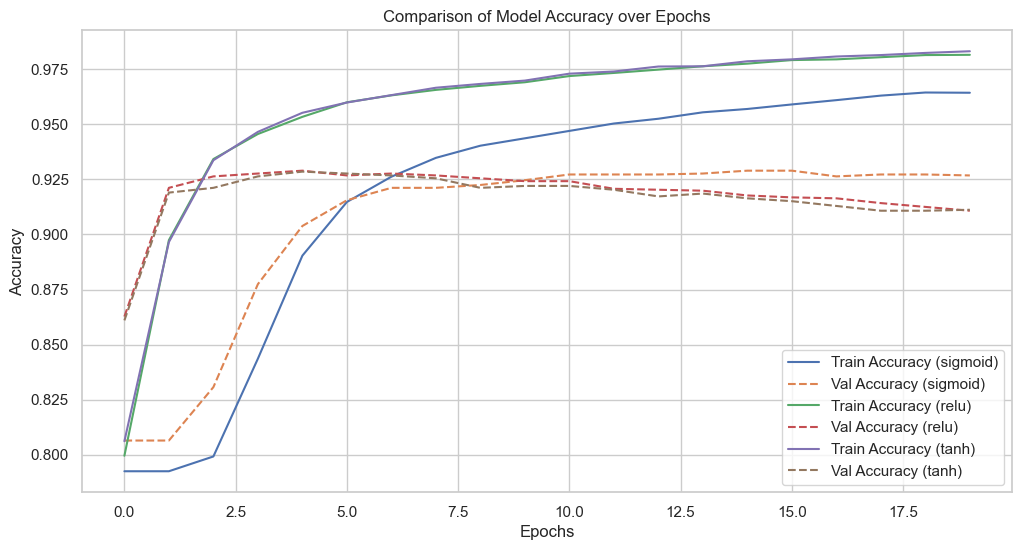

In [31]:
# Plot comparison of accuracy over epochs for all activation functions
plt.figure(figsize=(12, 6))  # Set the size of the figure

# Loop through each activation function to plot its training and validation accuracy
for activation in activation_functions:
    # Plot training accuracy for the current activation function
    plt.plot(histories[activation].history['accuracy'], label=f'Train Accuracy ({activation})')
    # Plot validation accuracy for the current activation function
    plt.plot(histories[activation].history['val_accuracy'], linestyle='--', label=f'Val Accuracy ({activation})')

# Set the title of the plot
plt.title('Comparison of Model Accuracy over Epochs')
# Set the label for the x-axis
plt.xlabel('Epochs')
# Set the label for the y-axis
plt.ylabel('Accuracy')
# Display the legend to differentiate between the activation functions
plt.legend()
# Show the plot
plt.show()
